# Discretization and Binnig
_Continuous data is often discretized or otherwise separated into “bins” for analysis. Suppose you have data about a group of people in a study, and you want to group them into discrete age buckets:

In [1]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [2]:
bins = [18,25,35,60,100]

In [3]:
interval = pd.cut(ages,bins)

<IPython.core.display.Javascript object>

In [4]:
interval

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [5]:
interval.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [6]:
interval.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')

# Alternate

In [7]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']

In [8]:
pd.cut(ages,bins,labels=group_names)

<IPython.core.display.Javascript object>

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

In [ ]:
##ONE MORE EXAMPLE

In [17]:
data = pd.cut(np.random.rand(20),
              4,
             precision=2)
#precision define how much decimal place you can cahnge by 2,3,4...default is 3

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
data

[(0.48, 0.69], (0.48, 0.69], (0.69, 0.91], (0.48, 0.69], (0.48, 0.69], ..., (0.69, 0.91], (0.26, 0.48], (0.69, 0.91], (0.48, 0.69], (0.48, 0.69]]
Length: 20
Categories (4, interval[float64]): [(0.038, 0.26] < (0.26, 0.48] < (0.48, 0.69] < (0.69, 0.91]]

# Quartile cut qcut

In [22]:
data1 = np.random.randn(1000) 
# randn=Normal distribution b/w -inf to inf
# rand = uniform distribution b\w 0 and 1

<IPython.core.display.Javascript object>

In [23]:
interval_1 = pd.qcut(data1,4)

<IPython.core.display.Javascript object>

In [24]:
interval_1

[(0.637, 3.12], (-2.997, -0.703], (-2.997, -0.703], (-0.00826, 0.637], (-2.997, -0.703], ..., (-0.00826, 0.637], (-2.997, -0.703], (-0.00826, 0.637], (-0.00826, 0.637], (-0.703, -0.00826]]
Length: 1000
Categories (4, interval[float64]): [(-2.997, -0.703] < (-0.703, -0.00826] < (-0.00826, 0.637] < (0.637, 3.12]]

<IPython.core.display.Javascript object>

(array([ 11.,  28.,  87., 171., 232., 234., 137.,  71.,  24.,   5.]),
 array([-2.99556936, -2.38400466, -1.77243997, -1.16087527, -0.54931057,
         0.06225413,  0.67381883,  1.28538353,  1.89694823,  2.50851293,
         3.12007763]),
 <a list of 10 Patch objects>)

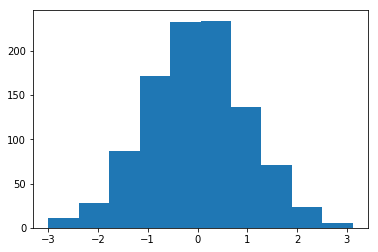

In [26]:
plt.hist(data1,)

# Quantile and Bucket Analysis

In [1]:
frame = pd.DataFrame({'data1': np.random.randn(1000),
....:
'data2': np.random.randn(1000)})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
quartiles = pd.cut(frame.data1, 4)

<IPython.core.display.Javascript object>

In [4]:
quartiles

0       (-1.208, 0.265]
1        (0.265, 1.739]
2       (-1.208, 0.265]
3      (-2.688, -1.208]
4        (0.265, 1.739]
5        (0.265, 1.739]
6       (-1.208, 0.265]
7        (0.265, 1.739]
8        (0.265, 1.739]
9       (-1.208, 0.265]
10      (-1.208, 0.265]
11      (-1.208, 0.265]
12       (1.739, 3.213]
13       (0.265, 1.739]
14       (1.739, 3.213]
15       (0.265, 1.739]
16     (-2.688, -1.208]
17       (1.739, 3.213]
18      (-1.208, 0.265]
19       (0.265, 1.739]
20      (-1.208, 0.265]
21       (0.265, 1.739]
22     (-2.688, -1.208]
23      (-1.208, 0.265]
24     (-2.688, -1.208]
25      (-1.208, 0.265]
26       (0.265, 1.739]
27      (-1.208, 0.265]
28      (-1.208, 0.265]
29     (-2.688, -1.208]
             ...       
970     (-1.208, 0.265]
971     (-1.208, 0.265]
972     (-1.208, 0.265]
973      (0.265, 1.739]
974      (0.265, 1.739]
975      (0.265, 1.739]
976     (-1.208, 0.265]
977     (-1.208, 0.265]
978      (0.265, 1.739]
979     (-1.208, 0.265]
980    (-2.688, 

In [5]:
def get_st(group):
    return {'min':group.min(),
            'max':group.max(),
            'count':group.count(),
           'mean':group.mean()}

In [6]:
groupping = frame.data2.groupby(quartiles)

In [7]:
groupping

In [9]:
ree = groupping.apply(get_st)

In [10]:
ree.unstack()

,count,max,mean,min
data1,,,,
"(-2.688, -1.208]",114.0,2.608097,0.109556,-1.716490
"(-1.208, 0.265]",493.0,3.027210,0.023051,-2.915537
"(0.265, 1.739]",348.0,3.068156,-0.024145,-2.461983
"(1.739, 3.213]",45.0,2.115785,-0.246988,-1.715621


# Qcut group

In [11]:
group_qcut = pd.qcut(frame.data1,10,labels=False)

<IPython.core.display.Javascript object>

In [12]:
grouping_of_qcut = frame.data2.groupby(group_qcut)

In [13]:
grouping_of_qcut.apply(get_st).unstack()

,count,max,mean,min
data1,,,,
0,100.0,2.608097,0.089084,-1.716490
1,100.0,2.134925,0.167637,-2.050982
2,100.0,2.248178,-0.034696,-2.247320
3,100.0,3.027210,0.129277,-2.506685
4,100.0,2.392133,0.000189,-2.915537
5,100.0,2.155674,-0.106917,-2.176953
6,100.0,2.042326,-0.159183,-2.461983
7,100.0,2.593173,0.076298,-2.059377
8,100.0,3.068156,0.026750,-1.962428
